# UPC Quantum Engineering Final Project: Quantum Channel Discrimination
## II. One-shot discrimination Base circuit

In [1]:
# Enabling the `widget` backend.print(totalFinalStates[1][zero_amplitude])
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib inline
# %matplotlib widget
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from itertools import product, combinations
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
from qiskit.providers.aer import noise
from qiskit.quantum_info import Operator, average_gate_fidelity, state_fidelity

from numpy import pi
from math import e
from matplotlib import colors, cm
from matplotlib.ticker import PercentFormatter
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal, CompleteMeasFitter, TensoredMeasFitter)

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math
from src.quantum_channel_discrimination import plot_probabilities2, run_base_circuit, plot_surface_probabilities, plot_wireframe_blochs, plot_surface_blochs

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')
state_backend_sim = Aer.get_backend('statevector_simulator')

In [7]:
points_theta = 10  # Points of Theta angle (pi) in Bloch sphere - min 2
points_phase = 20  # Points of Phase angle (2*pi) in Bloch sphere - min 2
# angles shift from first parameter, to the second one, with jumps using the third parameter
# angles_eta = np.arange(0, pi, 2*pi/(pointsTheta*pointsPhase))
# angles_eta = [0, pi/1.5]
out_rz_angle=0
out_ry_angle=0
angles_eta = np.arange(0, np.pi, 2*np.pi/(points_theta*points_phase))
# angles_eta = [pi/1.5]
initialStates, totalResults, totalCounts, totalCircuits, totalFinalStates, anglesPhase, Z_Output0, Z_Output1, X_Input0, X_Input1, Y_Eta, initialStatesReshaped, allChannelsFinalStatesReshaped, eta_degrees, total_state_vectors = run_base_circuit(angles_eta=angles_eta, points_theta=points_theta, points_phase=points_phase, iterations=2000, out_rz_angle=out_rz_angle, out_ry_angle=out_ry_angle)

Simulating channel with η = 0°
Simulating channel with η = 1°
Simulating channel with η = 3°
Simulating channel with η = 5°
Simulating channel with η = 7°
Simulating channel with η = 9°
Simulating channel with η = 10°
Simulating channel with η = 12°
Simulating channel with η = 14°
Simulating channel with η = 16°
Simulating channel with η = 18°
Simulating channel with η = 19°
Simulating channel with η = 21°
Simulating channel with η = 23°
Simulating channel with η = 25°
Simulating channel with η = 27°
Simulating channel with η = 28°
Simulating channel with η = 30°
Simulating channel with η = 32°
Simulating channel with η = 34°
Simulating channel with η = 36°
Simulating channel with η = 37°
Simulating channel with η = 39°
Simulating channel with η = 41°
Simulating channel with η = 43°
Simulating channel with η = 45°
Simulating channel with η = 46°
Simulating channel with η = 48°
Simulating channel with η = 50°
Simulating channel with η = 52°
Simulating channel with η = 54°
Simulating cha

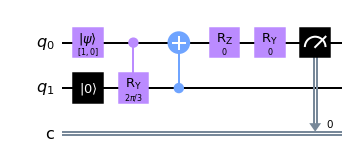

In [3]:
totalCircuits[0][10].draw('mpl')

### Fidelity of our damping channel for $\eta=\pi/4$

In [9]:
fidelity_all_channels = list(
    map( lambda state_vectors_one_channel: 
        list (map( lambda state_vector_execution: state_fidelity(state_vector_execution['input_state_vector'], state_vector_execution['output_state_vector']), state_vectors_one_channel )),
        total_state_vectors )
    )

In [8]:
def compute_fidelity(total_state_vectors):
    return list(map(lambda state_vectors_one_channel:
                    list(map(lambda state_vector_execution:
                             state_fidelity(state_vector_execution['input_state_vector'],
                                            state_vector_execution['output_state_vector']),
                             state_vectors_one_channel)), total_state_vectors)
                )

In [29]:
total_state_vectors[0][0]

{'input_state_vector': array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]),
 'output_state_vector': array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])}

In [22]:
def plot_fidelity(input_1_probability, total_state_vectors, angles_eta, rows=3, cols=3):
    fidelity_all_channels = compute_fidelity(total_state_vectors)
    fig = plt.figure(figsize=(rows*5, cols*10))
    index_channel = 0
    modulus_number = np.round(len(fidelity_all_channels) / (rows * cols))
    index_to_print = 0
    for fidelity_one_channel in fidelity_all_channels:
        if ((index_to_print == 0 or len(fidelity_all_channels) < modulus_number) or
                (index_to_print != 0 and index_channel % modulus_number == 0 and
                 index_to_print < (rows * cols))):
            # set up the axes for the second plot
            ax = fig.add_subplot(rows, cols, 1 + index_to_print)
            # draw final states
            ax.plot(input_1_probability[index_channel], fidelity_one_channel, 'o',
                    label="$\eta=" + str(int(math.degrees(angles_eta[index_channel]))) + "\degree$")
            ax.set_title(f"Fidelity Channel $\eta={str(int(math.degrees(angles_eta[index_channel])))} \degree$")
            ax.set_xlabel("Input State " + "$\\vert\\vert\\beta\\vert\\vert ^2  \\vert1\\rangle$")
            ax.set_ylabel('% Fidelity')
            index_to_print += 1
        index_channel += 1
    plt.show()

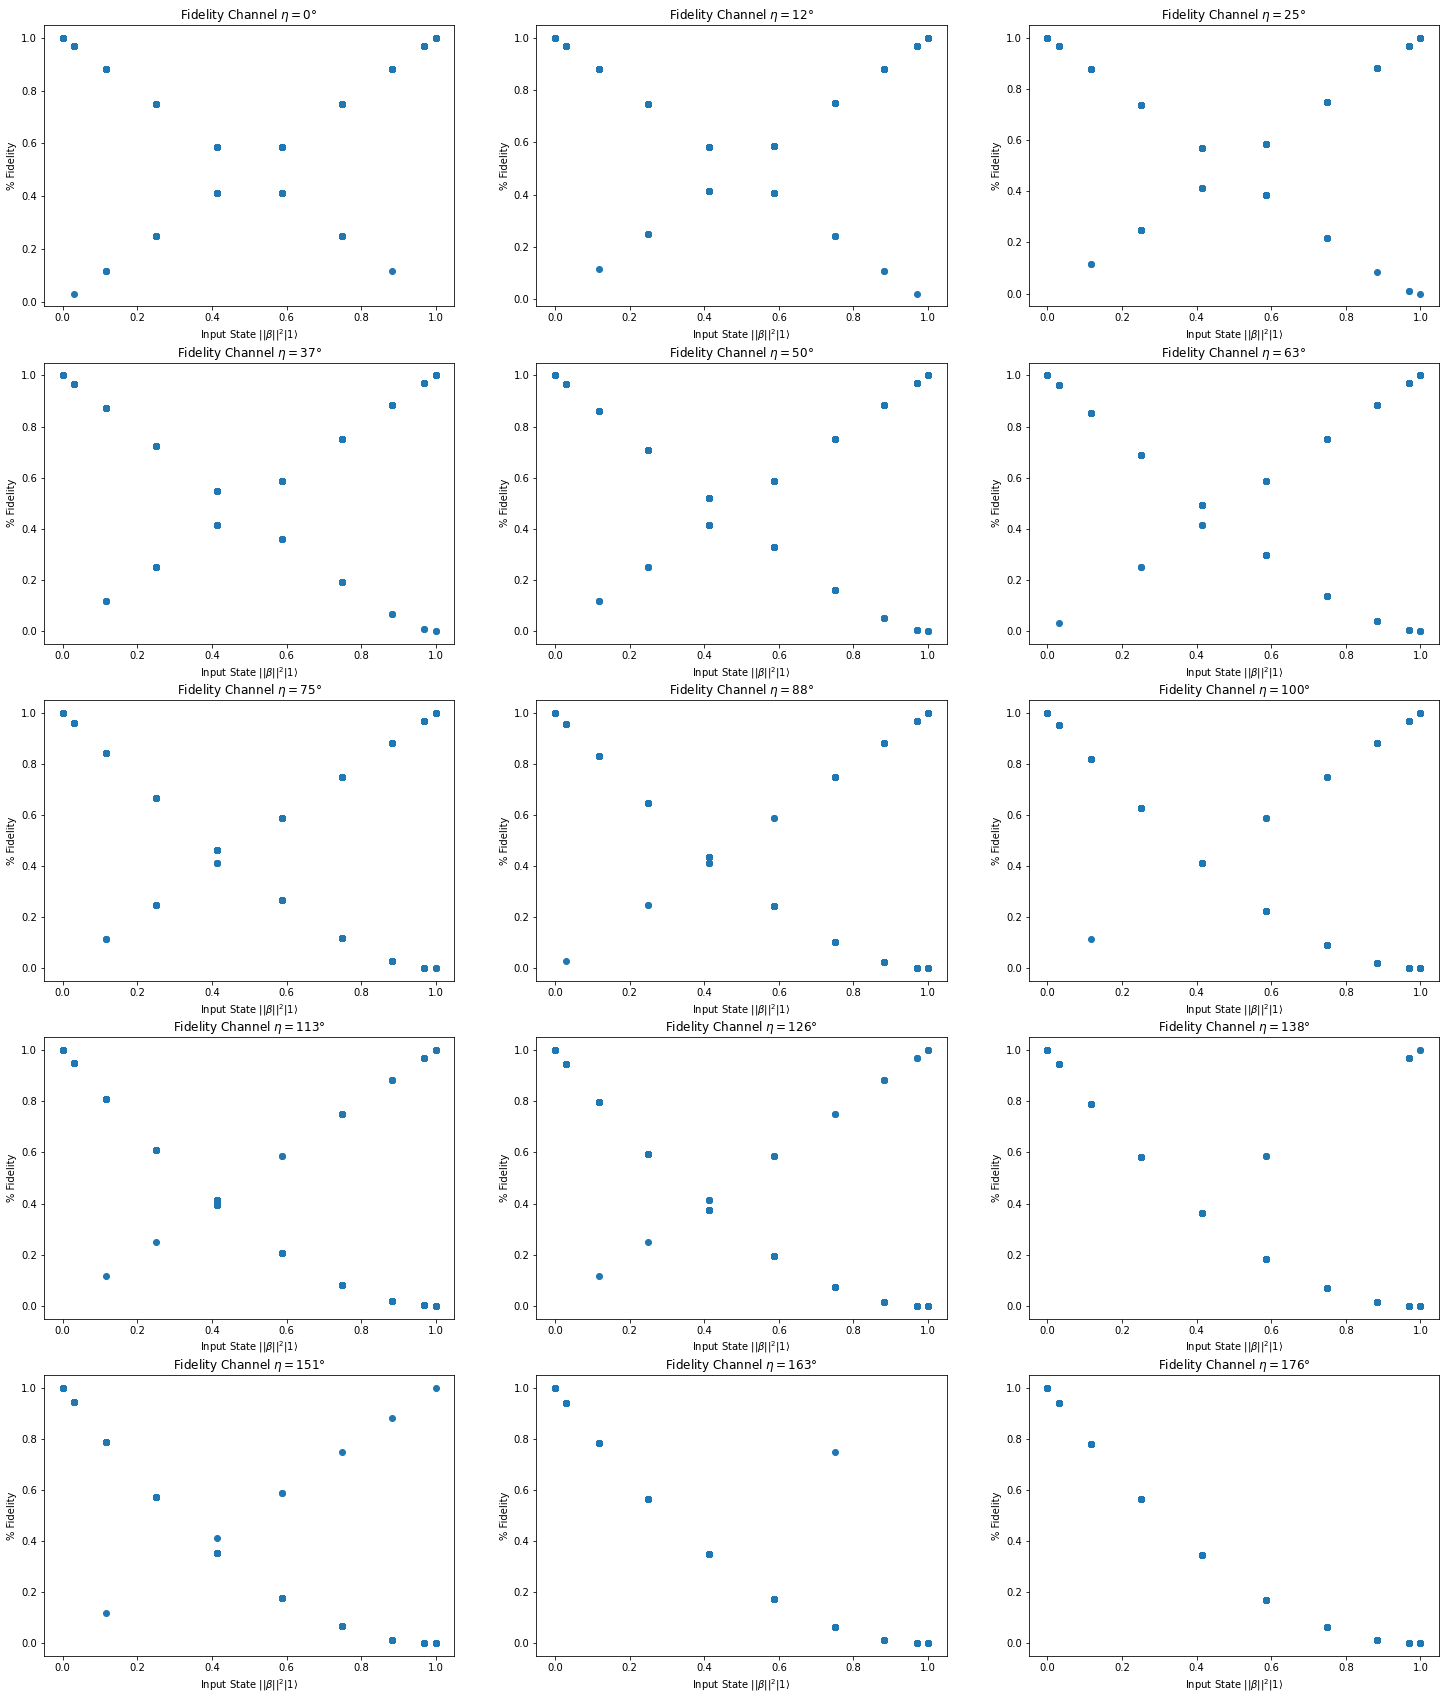

In [23]:
plot_fidelity(X_Input1, total_state_vectors, angles_eta, 5, 3)